In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

%matplotlib notebook

In [72]:
from simple_env import HuskyNavigateEnv, HuskySemanticNavigateEnv
from gibson.utils.play import play
import os
import yaml
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime

config_file = os.path.join('/root/intellisearch/play_husky_semantics.yaml')
print(config_file)

SAVE_PATH = "/root/img/"

/root/intellisearch/play_husky_semantics.yaml


In [3]:
conf = yaml.load(open(config_file))
pprint(conf)

{'display_ui': False,
 'envname': 'HuskyNavigateEnv',
 'fov': 1.57,
 'initial_orn': [0, 0, 1.37],
 'initial_pos': [0.3, 4.5, 1.2],
 'is_discrete': True,
 'mode': 'headless',
 'model_id': 'space7',
 'output': ['nonviz_sensor', 'rgb_filled', 'depth', 'normal', 'semantics'],
 'random': {'random_init_rot_range': [-0.1, 0.1],
            'random_init_x_range': [-0.1, 0.1],
            'random_init_y_range': [-0.1, 0.1],
            'random_init_z_range': [-0.1, 0.1],
            'random_initial_pose': False,
            'random_target_pose': False,
            'random_target_range': 0.1},
 'resolution': 512,
 'semantic_color': 2,
 'semantic_source': 1,
 'show_diagnostics': True,
 'speed': {'frameskip': 1, 'timestep': 0.01},
 'target_orn': [0, 0, 1.57],
 'target_pos': [-14.3, 45.57, 0.3],
 'ui_components': ['RGB_FILLED', 'DEPTH', 'NORMAL', 'SEMANTICS'],
 'ui_num': 4,
 'use_filler': True,
 'verbose': False}


In [4]:
env = HuskySemanticNavigateEnv(config=config_file, gpu_count = 8)

  0%|          | 0/1 [00:00<?, ?it/s]

Processing the data:
Total 1 scenes 0 train 1 test
Indexing


100%|██████████| 190/190 [00:13<00:00, 14.03it/s]


In [5]:
def reset_env(env):
    """reset and observe the environment"""
    env.reset()
    obs = env.observe()
    return obs

In [8]:
def get_smat(obs):
    """get semantics from obs"""
    return obs["semantics"]
def get_rmat(obs):
    """get rgb from obs"""
    return obs["rgb_filled"]
def get_dmat(obs):
    """get depth from obs"""
    return obs["depth"]

In [62]:
def plot(mat):
    """plot image matrix and save"""
    fig = plt.figure()
    px = fig.add_subplot(111)
    plt.ion()

    fig.show()
    fig.canvas.draw()

    px.clear()
    plt.imsave(SAVE_PATH + str(datetime.now().strftime("%y%m%d-%H%M%S")) + '.png', mat)
    px.imshow(mat)
    fig.canvas.draw()

In [84]:
def plot2(mat1, mat2, i):
    "plot two image matrices and save"
#     fig = plt.figure()
#     ax = fig.add_subplot(121)
#     bx = fig.add_subplot(122)
#     plt.ion()

#     fig.show()
#     fig.canvas.draw()

#     bx.clear()
#     ax.clear()
#     ax.imshow(mat1)
#     bx.imshow(mat2)
    plt.imsave(SAVE_PATH + str(datetime.now().strftime("%y%m%d-%H%M%S")) + i + 'r.png', mat1)  
    plt.imsave(SAVE_PATH + str(datetime.now().strftime("%y%m%d-%H%M%S")) + i + 's.png', mat2)
#     fig.canvas.draw()

In [64]:
def set_pos(env, x, y, z):
    "set position of robot x,y,z"
    env.robot.set_position(np.array([x, y, z]))

In [19]:
from transforms3d.euler import euler2quat, euler2mat
from transforms3d.quaternions import quat2mat, qmult
import transforms3d.quaternions as quat

def quatFromXYZW(xyzw, seq='xyzw'):
    """Convert quaternion from arbitrary sequence to XYZW (pybullet convention)
    """
    assert len(seq) == 4 and 'x' in seq and 'y' in seq and 'z' in seq and 'w' in seq, \
        "Quaternion sequence {} is not valid, please double check.".format(seq)
    inds = [seq.index('x'), seq.index('y'), seq.index('z'), seq.index('w')]
    return xyzw[inds]

def quatToXYZW(orn, seq='xyzw'):
    """Convert quaternion from XYZW (pybullet convention) to arbitrary sequence
    """
    assert len(seq) == 4 and 'x' in seq and 'y' in seq and 'z' in seq and 'w' in seq, \
        "Quaternion sequence {} is not valid, please double check.".format(seq)
    inds = [seq.index('x'), seq.index('y'), seq.index('z'), seq.index('w')]
    return orn[inds]

In [21]:
def set_orient(env,x,y,z,w):
    env.robot.set_orient(np.array([x,y,z,w]))

In [22]:
def set_camconf(env, y, z, d, p):
    env.tracking_camera ={
        'yaw': y,
        'z_offset': z,
        'distance': d,
        'pitch': p
    }

In [60]:
print(env.robot.get_position())
print(env.robot.get_orientation())
print(env.tracking_camera)
print(env.get_eye_pos_orientation())

[0. 5. 1.]
[0.         0.         0.63267301 0.77441905]
{'pitch': -20, 'yaw': 110, 'z_offset': 0, 'distance': 9}
(array([0.0578369 , 5.28671307, 1.029718  ]), [0.7038542539934485, 0.7032940159319114, -0.0705647930984904, -0.07062100441552499])


In [42]:
observation = reset_env(env)

Episode: steps:0 score:0
[0.3158397278099951, 4.580165451711846, 1.2],
Episode count: 2


In [81]:
set_camconf(env, 110, 0, 9, -20)
set_pos(env, 0,4,1)

env.reset()

Episode: steps:0 score:0
[0.29007657147983507, 4.581110555365281, 1.2],
Episode count: 4


{'depth': array([[[1.0623368 ],
         [1.0622754 ],
         [1.062214  ],
         ...,
         [1.1999458 ],
         [1.1959935 ],
         [1.1920673 ]],
 
        [[1.0663329 ],
         [1.0662711 ],
         [1.0662093 ],
         ...,
         [1.1998934 ],
         [1.1959414 ],
         [1.1920154 ]],
 
        [[1.0703593 ],
         [1.070297  ],
         [1.0702348 ],
         ...,
         [1.1998409 ],
         [1.1958894 ],
         [1.1919637 ]],
 
        ...,
 
        [[1.1341335 ],
         [1.1347815 ],
         [1.1354302 ],
         ...,
         [0.5201121 ],
         [0.5201129 ],
         [0.52011365]],
 
        [[1.1339523 ],
         [1.1346002 ],
         [1.1352487 ],
         ...,
         [0.51805145],
         [0.5180523 ],
         [0.51805305]],
 
        [[1.1337711 ],
         [1.1344187 ],
         [1.1350671 ],
         ...,
         [0.5160072 ],
         [0.51600796],
         [0.51600873]]], dtype=float32),
 'nonviz_sensor': array([ 0.   

In [86]:
for i in range(209):
    print(i)
    env.robot.turn_left()
    observation = env.observe()
    rgb = get_r(observation)
    sem = get_s(observation)
    plot2(rgb, sem, str(i))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208


<IPython.core.display.Javascript object>


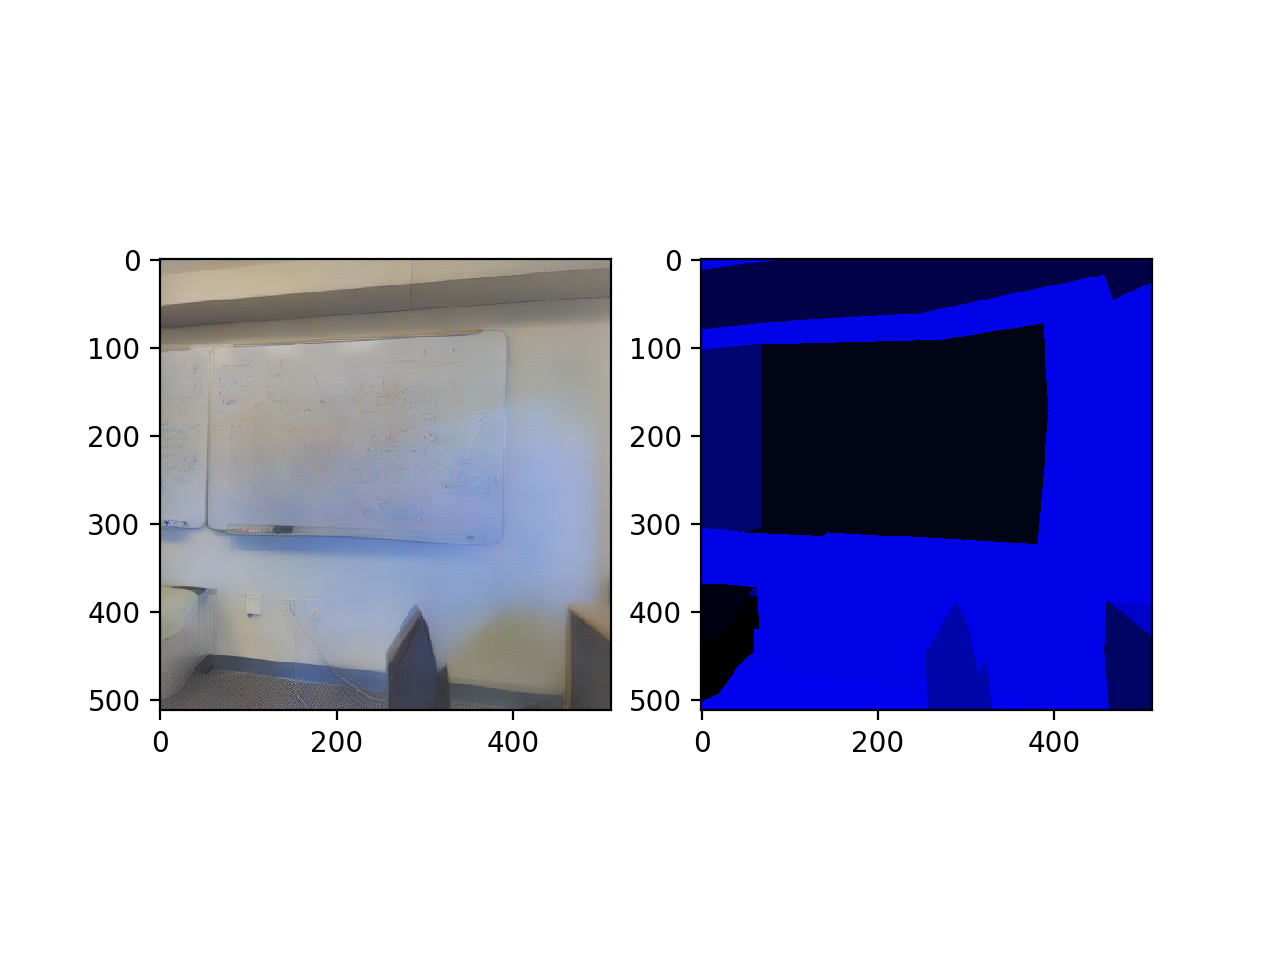

In [79]:
plot2(rgb, sem)

In [59]:
def set_config(env, c):
    """config c to be an 11-length of
        position: x, y, z
        orientation: w, y, z, w
        camera config: yaw, z offset, distance, pitch
    """
    set_pos(env, c[0], c[1], c[2])
    set_orient(env, c[3], c[4], c[5], c[6])
    set_camconf(env, c[7],c[8], c[9], c[10])